In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.io as scio
from PyEMD import EMD,CEEMDAN,EEMD
import os
from scipy.io import loadmat
import tensorflow as tf
import os
import sys
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
import glob
from skimage import transform
from PIL import Image
import skimage
from skimage import io


['E:\\CAET\\无车图片', 'E:\\CAET\\有车图片']
Epoch 1/50
30/30 [==============================] - 1s 25ms/step - loss: 0.7316 - accuracy: 0.5378 - val_loss: 0.7469 - val_accuracy: 0.2143
Epoch 2/50
30/30 [==============================] - 1s 18ms/step - loss: 0.5878 - accuracy: 0.7395 - val_loss: 0.3903 - val_accuracy: 0.9286
Epoch 3/50
30/30 [==============================] - 1s 19ms/step - loss: 0.2332 - accuracy: 0.9748 - val_loss: 0.2607 - val_accuracy: 0.9286
Epoch 4/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0810 - accuracy: 0.9916 - val_loss: 0.2872 - val_accuracy: 0.9286
Epoch 5/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0618 - accuracy: 0.9916 - val_loss: 0.2929 - val_accuracy: 0.9286
Epoch 6/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0534 - accuracy: 0.9916 - val_loss: 0.2999 - val_accuracy: 0.9286
Epoch 7/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0507 - accuracy: 0.9916 - val_loss: 0.2856

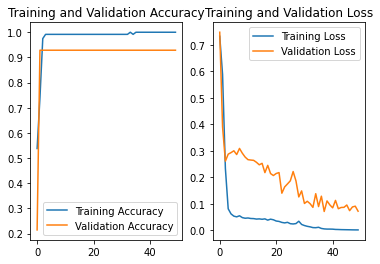

In [17]:

path = 'E:\\CAET\\'

def read_img(path):
    
    cate = [path+x for x in os.listdir(path)if '图片' in x]
    print(cate)
    imgs = []
    labels = []
    for idx, folder in enumerate(cate):
        for im in glob.glob(folder + '/*.png'):
#             print('reading the images:%s' % (im))
            img =io.imread(im)
#             print(img.shape)
            #img = transform.resize(img, (w, h))
            # print(img.shape)
            imgs.append(img)
            labels.append(idx)
#         print(labels)
    return np.asarray(imgs, np.float32), np.asarray(labels, np.int32)
# read_img(path)




data, label = read_img(path)

num_example = data.shape[0]
arr = np.arange(num_example)
np.random.shuffle(arr)
# data = data[arr]/255
data = data[arr]/255

label = label[arr]
ratio = 0.7
s = np.int_(num_example * ratio)
x_train = data[:s]
y_train = label[:s]
x_test = data[s:]
y_test = label[s:]


x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='relu')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(2, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y
model = LeNet5()

from keras import optimizers
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])




history = model.fit(x_train, y_train, batch_size=4, epochs=50, validation_split=0.1, validation_freq=1,
                    )
model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

['E:\\CAET\\无车灰度', 'E:\\CAET\\有车灰度']
Epoch 1/500
15/15 [==============================] - 1s 26ms/step - loss: 0.7342 - accuracy: 0.4706 - val_loss: 0.6219 - val_accuracy: 0.7143
Epoch 2/500
15/15 [==============================] - 0s 16ms/step - loss: 0.7134 - accuracy: 0.5294 - val_loss: 0.7585 - val_accuracy: 0.2857
Epoch 3/500
15/15 [==============================] - 0s 19ms/step - loss: 0.7171 - accuracy: 0.4706 - val_loss: 0.6199 - val_accuracy: 0.7143
Epoch 4/500
15/15 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5546 - val_loss: 0.6445 - val_accuracy: 0.7143
Epoch 5/500
15/15 [==============================] - 0s 19ms/step - loss: 0.6951 - accuracy: 0.4874 - val_loss: 0.6593 - val_accuracy: 0.7143
Epoch 6/500
15/15 [==============================] - 0s 16ms/step - loss: 0.6969 - accuracy: 0.5546 - val_loss: 0.6302 - val_accuracy: 0.7143
Epoch 7/500
15/15 [==============================] - 0s 20ms/step - loss: 0.6935 - accuracy: 0.5546 - val_loss:

15/15 [==============================] - 0s 17ms/step - loss: 7.3972e-04 - accuracy: 1.0000 - val_loss: 2.9931e-04 - val_accuracy: 1.0000
Epoch 114/500
15/15 [==============================] - 0s 19ms/step - loss: 7.1765e-04 - accuracy: 1.0000 - val_loss: 2.9160e-04 - val_accuracy: 1.0000
Epoch 115/500
15/15 [==============================] - 0s 19ms/step - loss: 7.0218e-04 - accuracy: 1.0000 - val_loss: 2.8620e-04 - val_accuracy: 1.0000
Epoch 116/500
15/15 [==============================] - 0s 18ms/step - loss: 6.8704e-04 - accuracy: 1.0000 - val_loss: 2.8169e-04 - val_accuracy: 1.0000
Epoch 117/500
15/15 [==============================] - 0s 18ms/step - loss: 6.7350e-04 - accuracy: 1.0000 - val_loss: 2.7687e-04 - val_accuracy: 1.0000
Epoch 118/500
15/15 [==============================] - 0s 20ms/step - loss: 6.5730e-04 - accuracy: 1.0000 - val_loss: 2.7221e-04 - val_accuracy: 1.0000
Epoch 119/500
15/15 [==============================] - 0s 18ms/step - loss: 6.4719e-04 - accuracy: 1.0

Epoch 167/500
15/15 [==============================] - 0s 20ms/step - loss: 2.9530e-04 - accuracy: 1.0000 - val_loss: 1.3434e-04 - val_accuracy: 1.0000
Epoch 168/500
15/15 [==============================] - 0s 20ms/step - loss: 2.8911e-04 - accuracy: 1.0000 - val_loss: 1.3232e-04 - val_accuracy: 1.0000
Epoch 169/500
15/15 [==============================] - 0s 18ms/step - loss: 2.8566e-04 - accuracy: 1.0000 - val_loss: 1.3076e-04 - val_accuracy: 1.0000
Epoch 170/500
15/15 [==============================] - 0s 20ms/step - loss: 2.8436e-04 - accuracy: 1.0000 - val_loss: 1.2961e-04 - val_accuracy: 1.0000
Epoch 171/500
15/15 [==============================] - 0s 18ms/step - loss: 2.8109e-04 - accuracy: 1.0000 - val_loss: 1.2733e-04 - val_accuracy: 1.0000
Epoch 172/500
15/15 [==============================] - 0s 15ms/step - loss: 2.7721e-04 - accuracy: 1.0000 - val_loss: 1.2652e-04 - val_accuracy: 1.0000
Epoch 173/500
15/15 [==============================] - 0s 18ms/step - loss: 2.6956e-04 -

Epoch 221/500
15/15 [==============================] - 0s 16ms/step - loss: 1.5056e-04 - accuracy: 1.0000 - val_loss: 7.3105e-05 - val_accuracy: 1.0000
Epoch 222/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4884e-04 - accuracy: 1.0000 - val_loss: 7.2373e-05 - val_accuracy: 1.0000
Epoch 223/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4711e-04 - accuracy: 1.0000 - val_loss: 7.1589e-05 - val_accuracy: 1.0000
Epoch 224/500
15/15 [==============================] - 0s 18ms/step - loss: 1.4523e-04 - accuracy: 1.0000 - val_loss: 7.0866e-05 - val_accuracy: 1.0000
Epoch 225/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4402e-04 - accuracy: 1.0000 - val_loss: 7.0167e-05 - val_accuracy: 1.0000
Epoch 226/500
15/15 [==============================] - 0s 12ms/step - loss: 1.4257e-04 - accuracy: 1.0000 - val_loss: 6.9469e-05 - val_accuracy: 1.0000
Epoch 227/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4179e-04 -

Epoch 275/500
15/15 [==============================] - 0s 14ms/step - loss: 8.7239e-05 - accuracy: 1.0000 - val_loss: 4.4881e-05 - val_accuracy: 1.0000
Epoch 276/500
15/15 [==============================] - 0s 18ms/step - loss: 8.5979e-05 - accuracy: 1.0000 - val_loss: 4.4523e-05 - val_accuracy: 1.0000
Epoch 277/500
15/15 [==============================] - 0s 19ms/step - loss: 8.5415e-05 - accuracy: 1.0000 - val_loss: 4.4157e-05 - val_accuracy: 1.0000
Epoch 278/500
15/15 [==============================] - 0s 15ms/step - loss: 8.4525e-05 - accuracy: 1.0000 - val_loss: 4.3791e-05 - val_accuracy: 1.0000
Epoch 279/500
15/15 [==============================] - 0s 17ms/step - loss: 8.3709e-05 - accuracy: 1.0000 - val_loss: 4.3340e-05 - val_accuracy: 1.0000
Epoch 280/500
15/15 [==============================] - 0s 19ms/step - loss: 8.2930e-05 - accuracy: 1.0000 - val_loss: 4.3008e-05 - val_accuracy: 1.0000
Epoch 281/500
15/15 [==============================] - 0s 16ms/step - loss: 8.2164e-05 -

Epoch 329/500
15/15 [==============================] - 0s 16ms/step - loss: 5.3768e-05 - accuracy: 1.0000 - val_loss: 2.9120e-05 - val_accuracy: 1.0000
Epoch 330/500
15/15 [==============================] - 0s 16ms/step - loss: 5.3018e-05 - accuracy: 1.0000 - val_loss: 2.8908e-05 - val_accuracy: 1.0000
Epoch 331/500
15/15 [==============================] - 0s 17ms/step - loss: 5.2579e-05 - accuracy: 1.0000 - val_loss: 2.8669e-05 - val_accuracy: 1.0000
Epoch 332/500
15/15 [==============================] - 0s 19ms/step - loss: 5.2223e-05 - accuracy: 1.0000 - val_loss: 2.8465e-05 - val_accuracy: 1.0000
Epoch 333/500
15/15 [==============================] - 0s 18ms/step - loss: 5.1938e-05 - accuracy: 1.0000 - val_loss: 2.8209e-05 - val_accuracy: 1.0000
Epoch 334/500
15/15 [==============================] - 0s 15ms/step - loss: 5.1327e-05 - accuracy: 1.0000 - val_loss: 2.8048e-05 - val_accuracy: 1.0000
Epoch 335/500
15/15 [==============================] - 0s 11ms/step - loss: 5.1069e-05 -

Epoch 383/500
15/15 [==============================] - 0s 18ms/step - loss: 3.4184e-05 - accuracy: 1.0000 - val_loss: 1.9422e-05 - val_accuracy: 1.0000
Epoch 384/500
15/15 [==============================] - 0s 17ms/step - loss: 3.3815e-05 - accuracy: 1.0000 - val_loss: 1.9278e-05 - val_accuracy: 1.0000
Epoch 385/500
15/15 [==============================] - 0s 14ms/step - loss: 3.3543e-05 - accuracy: 1.0000 - val_loss: 1.9133e-05 - val_accuracy: 1.0000
Epoch 386/500
15/15 [==============================] - 0s 12ms/step - loss: 3.3311e-05 - accuracy: 1.0000 - val_loss: 1.9005e-05 - val_accuracy: 1.0000
Epoch 387/500
15/15 [==============================] - 0s 15ms/step - loss: 3.3027e-05 - accuracy: 1.0000 - val_loss: 1.8877e-05 - val_accuracy: 1.0000
Epoch 388/500
15/15 [==============================] - 0s 18ms/step - loss: 3.2798e-05 - accuracy: 1.0000 - val_loss: 1.8733e-05 - val_accuracy: 1.0000
Epoch 389/500
15/15 [==============================] - 0s 18ms/step - loss: 3.2517e-05 -

Epoch 437/500
15/15 [==============================] - 0s 17ms/step - loss: 2.2262e-05 - accuracy: 1.0000 - val_loss: 1.3121e-05 - val_accuracy: 1.0000
Epoch 438/500
15/15 [==============================] - 0s 18ms/step - loss: 2.2078e-05 - accuracy: 1.0000 - val_loss: 1.3045e-05 - val_accuracy: 1.0000
Epoch 439/500
15/15 [==============================] - 0s 16ms/step - loss: 2.1867e-05 - accuracy: 1.0000 - val_loss: 1.2951e-05 - val_accuracy: 1.0000
Epoch 440/500
15/15 [==============================] - 0s 19ms/step - loss: 2.1723e-05 - accuracy: 1.0000 - val_loss: 1.2874e-05 - val_accuracy: 1.0000
Epoch 441/500
15/15 [==============================] - 0s 17ms/step - loss: 2.1499e-05 - accuracy: 1.0000 - val_loss: 1.2781e-05 - val_accuracy: 1.0000
Epoch 442/500
15/15 [==============================] - 0s 14ms/step - loss: 2.1382e-05 - accuracy: 1.0000 - val_loss: 1.2662e-05 - val_accuracy: 1.0000
Epoch 443/500
15/15 [==============================] - 0s 17ms/step - loss: 2.1197e-05 -

Epoch 491/500
15/15 [==============================] - 0s 14ms/step - loss: 1.4657e-05 - accuracy: 1.0000 - val_loss: 8.9662e-06 - val_accuracy: 1.0000
Epoch 492/500
15/15 [==============================] - 0s 19ms/step - loss: 1.4543e-05 - accuracy: 1.0000 - val_loss: 8.8896e-06 - val_accuracy: 1.0000
Epoch 493/500
15/15 [==============================] - 0s 16ms/step - loss: 1.4416e-05 - accuracy: 1.0000 - val_loss: 8.8214e-06 - val_accuracy: 1.0000
Epoch 494/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4341e-05 - accuracy: 1.0000 - val_loss: 8.7618e-06 - val_accuracy: 1.0000
Epoch 495/500
15/15 [==============================] - 0s 19ms/step - loss: 1.4244e-05 - accuracy: 1.0000 - val_loss: 8.7193e-06 - val_accuracy: 1.0000
Epoch 496/500
15/15 [==============================] - 0s 15ms/step - loss: 1.4080e-05 - accuracy: 1.0000 - val_loss: 8.6341e-06 - val_accuracy: 1.0000
Epoch 497/500
15/15 [==============================] - 0s 17ms/step - loss: 1.3993e-05 -

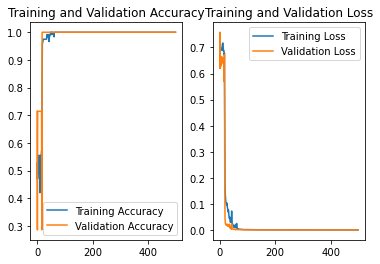

不转二值化，转灰度图

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.io as scio
from PyEMD import EMD,CEEMDAN,EEMD
import os
from scipy.io import loadmat
import tensorflow as tf
import os
import sys
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
import glob
from skimage import transform
from PIL import Image
import skimage
from skimage import io
path = "E:\CAET\有车"
# ######读数据
def dushuju():

    names = os.listdir(path)
    print(names)

    # len(names)
    for q in range(len(names)):
        n = names[q]
        files = os.path.join(path, n)
        files = files.strip()
        print(files)
        print(files.isspace())

        # SJ = np.loadtxt(files)

        SJ = pd.read_csv(files)
        SJ = SJ[10:]
        print(type(SJ))
        SJ =np.array(SJ).reshape(-1,1)
        SJ = SJ.tolist()
        list =[]
        for l in range(len(SJ)):
            list.append(SJ[l][0])
        SJ = list
        SJ = np.array(SJ)
        print(SJ)
        n = 0
        tupian = []
        for f in range(64):
            s = n
            n = n + 128
            a = SJ[s:n]
            #         print(a)
            emd = EMD()
            imfs_emd = emd(a)
            xg = []
            for i in range(imfs_emd.shape[0]):
                #         print(imfs_emd[i,:])
                '''x1 = pd.Series(SJ)
                y1 = pd.Series(imfs_emd[i, :])
                cor = round(x1.corr(y1), 4)'''

                x1 = a
                y1 = imfs_emd[i, :]
                z1 = x1 * y1
                z1 = np.sum(z1)
                cor = z1 / (np.sqrt(np.sum(x1 ** 2) * np.sum(y1 ** 2)))  # 相关系数

                xg.append(cor)
            #         print(xg)
            xgmax = xg.index(max(xg))
            #         print(xgmax)
            xgfft = imfs_emd[xgmax, :]
            xgfft = np.fft.fft(xgfft)
            xgfft = abs(xgfft)
            #         print(xgfft,len(xgfft))
            xgfft = xgfft[0:64]
            #         print(xgfft)
            gy = 255 * (xgfft - np.min(xgfft)) / (np.max(xgfft) - np.min(xgfft))
            tupian.append(gy)
        #     print(tupian)
        tupian = np.array(tupian)
        #     print (tupian.shape)

        im = Image.fromarray(tupian)
        im = im.convert('L')  # 这样才能转为灰度图，如果是彩色图则改L为‘RGB’
#         threshold = 127  # 设定的阈值
#         table = []
#         for i in range(256):
#             if i < threshold:
#                 table.append(0)
#             else:
#                 table.append(1)
#         photo = im.point(table, '1')
#         # photo.show()
        im.save("E:\\CAET\\有车灰度\\" + str(q) + '.png')


dushuju()

['1-1-2021-12-15-16-34-10.txt', '1-10-2021-12-15-16-46-29.txt', '1-11-2021-12-15-16-47-51.txt', '1-12-2021-12-15-16-49-13.txt', '1-13-2021-12-15-16-50-36.txt', '1-14-2021-12-15-16-51-58.txt', '1-15-2021-12-15-16-53-20.txt', '1-16-2021-12-15-16-54-42.txt', '1-17-2021-12-15-16-56-4.txt', '1-18-2021-12-15-16-57-26.txt', '1-19-2021-12-15-16-58-48.txt', '1-2-2021-12-15-16-35-32.txt', '1-20-2021-12-15-17-0-11.txt', '1-21-2021-12-15-17-1-33.txt', '1-22-2021-12-15-17-2-55.txt', '1-23-2021-12-15-17-4-17.txt', '1-24-2021-12-15-17-5-39.txt', '1-25-2021-12-15-17-7-1.txt', '1-26-2021-12-15-17-8-24.txt', '1-27-2021-12-15-17-9-46.txt', '1-28-2021-12-15-17-11-8.txt', '1-29-2021-12-15-17-12-30.txt', '1-3-2021-12-15-16-36-54.txt', '1-30-2021-12-15-17-13-52.txt', '1-31-2021-12-15-17-15-14.txt', '1-32-2021-12-15-17-16-37.txt', '1-33-2021-12-15-17-17-59.txt', '1-4-2021-12-15-16-38-16.txt', '1-5-2021-12-15-16-39-38.txt', '1-6-2021-12-15-16-41-0.txt', '1-7-2021-12-15-16-42-23.txt', '1-8-2021-12-15-16-43-45.t

E:\CAET\有车\2-11-2021-4-9-18-42-13.txt
False
<class 'pandas.core.frame.DataFrame'>
[ 2454.099854  4326.099854  1794.099854 ... -4278.900146 -9244.900146
 -9008.900146]
E:\CAET\有车\2-12-2021-4-9-18-43-35.txt
False
<class 'pandas.core.frame.DataFrame'>
[ 1090.647339 -3273.352661 -4720.352661 ...  -206.352661  1023.647339
  1147.647339]
E:\CAET\有车\2-13-2021-4-9-18-44-57.txt
False
<class 'pandas.core.frame.DataFrame'>
[  77.774414 3780.774414 6205.774414 ... 1091.774414 1470.774414
 4507.774414]
E:\CAET\有车\2-14-2021-4-9-18-46-19.txt
False
<class 'pandas.core.frame.DataFrame'>
[-3510.897949  -721.897949 -4397.897949 ... -2719.897949  -788.897949
  2082.102051]
E:\CAET\有车\2-15-2021-4-9-18-47-41.txt
False
<class 'pandas.core.frame.DataFrame'>
[ 5177.807983  2882.807983  -884.192017 ... -7517.192017 -7965.192017
 -3936.192017]
E:\CAET\有车\2-16-2021-4-9-18-49-4.txt
False
<class 'pandas.core.frame.DataFrame'>
[-3382.787231 -3503.787231 -2168.787231 ...  -212.787231  -842.787231
 -3570.787231]
E:\CA

VMD

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD
import pandas as pd
from scipy.fftpack import fft,ifft


# x = np.linspace(0,len(f),len(f))
f = pd.read_csv(r"E:\CAET\无车\1-1-2021-12-23-1-34-29.txt", sep="\t")

x = np.linspace(0, 8192, 8192)

f= f[10:]
f = np.array(f)
print(f)


alpha = 2000       # moderate bandwidth constraint
tau = 0.            # noise-tolerance (no strict fidelity enforcement)
K =4              # 3 modes
DC = 0             # no DC part imposed
init = 1           # initialize omegas uniformly
tol = 1e-7


#. Run VMD
u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol)


print(u.shape)

[[-960.55835]
 [-733.55835]
 [-639.55835]
 ...
 [-687.55835]
 [-279.55835]
 [ 114.44165]]
(4, 8192)


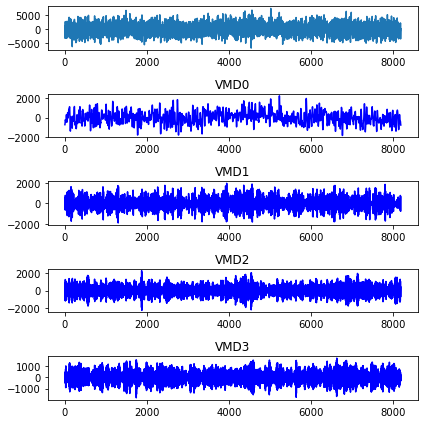

8192


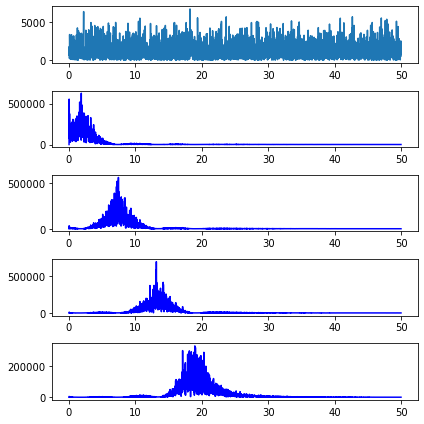

In [3]:


plt.figure(figsize=(6,6))
plt.subplot(1 + u.shape[0], 1, 1 )
plt.plot(f)
for i in range(u.shape[0]):

    plt.subplot(1 + u.shape[0],1,2+i)
    plt.plot(x,u[i,:],'b')
    plt.title("VMD"+str(i))
plt.tight_layout()
plt.show()



f = np.array(f)
Fs = 100.0     # sampling rate采样率
Ts = 1.0/Fs    # sampling interval 采样区间
t = np.arange(len(f))  # time vector,这里Ts也是步长

n = len(f)     # length of the signal
print(n)
k = np.arange(n)
T = n/Fs
frq = k/T     # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = fft(f)
N = len(YY)
half_x = np.arange(int(N / 2)) # 取一半区间
abs_y = np.abs(YY)



plt.figure(figsize=(6,6))
plt.subplot(1 + u.shape[0], 1, 1 )
plt.plot(frq1,abs_y[range(int(N / 2))])
for i in range(u.shape[0]):
    plt.subplot(1 + u.shape[0], 1, 2 + i)
    YY = fft(u[i, :])
#     print(u[i, :])

    N = len(YY)
#     print(N)
    half_x = np.arange(int(N / 2)) # 取一半区间
#     print(half_x)
    abs_y = np.abs(YY)  # 取复数的绝对值，即复数的模(双边频谱)
    normalization_y = abs_y / N  # 归一化处理（双边频谱）
    yy = normalization_y[range(int(N / 2))]  # 由于对称性，只取一半区间（单边频谱）

    plt.plot(frq1,abs_y[range(int(N / 2))], 'b')
plt.tight_layout()
plt.show()

[-729.58813522 -719.74664995 -703.52633741 ... -755.23022631 -764.94446549
 -767.28065629]
[-729.58813522 -719.74664995 -703.52633741 ... -755.23022631 -764.94446549
 -767.28065629]
[504.63957678 328.83808685  24.16808821 ...  41.10186693 404.18502504
 621.3095146 ]
[-224.94855844 -390.9085631  -679.3582492  ... -714.12835938 -360.75944045
 -145.97114169]
[-830.91498484 -332.72418212  362.44590466 ...   64.83820253  296.51507399
  394.996442  ]
[-1055.86354328  -723.63274522  -316.91234455 ...  -649.29015685
   -64.24436646   249.02530031]
[ 316.98941352   46.64642143 -327.93325384 ...  217.23307954    8.0783786
 -188.8293052 ]
[-738.87412975 -676.98632379 -644.84559839 ... -432.05707731  -56.16598785
   60.1959951 ]
[-738.87412975 -676.98632379 -644.84559839 ... -432.05707731  -56.16598785
   60.1959951 ]


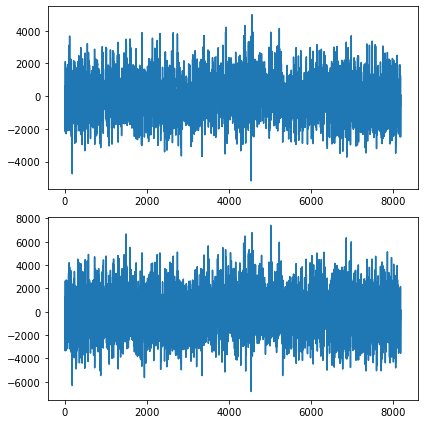

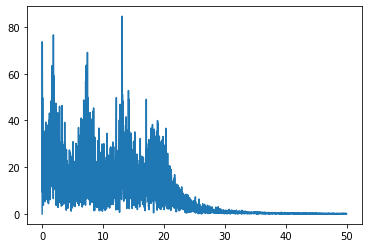

In [6]:
u1 = 0
for i in range(u.shape[0]):
    
    print(u[i,:])
    u1 = u[i,:]+u1
    print(u1)
print(u1)

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.plot(u1)
plt.subplot(212)
plt.plot(f)
plt.tight_layout()
plt.show()


frq = np.arange(8192)/(8192/100) 
ff = np.fft.fft(u1)
ff = abs(ff)
ff = ff/8192
plt.plot(frq[range(int(8192/2))],ff[range(int(8192 / 2))])
plt.show()

In [7]:
import numpy as np

def you_fbank_v10(us_speckLen = 1, us_sample_rate = 8000, us_signal = [], us_frame_size = 0.025, us_frame_stride = 0.01, us_NFFT = 512, us_nfilt = 40):
    '''
    对音频信号进行fbank分析
    :param us_speckLen:
    :param us_sample_rate:采样率
    :param us_signal:信号序列
    :param us_frame_size:fbank窗口大小
    :param us_frame_stride:fbank窗口步进
    :param us_NFFT:fft分析长短
    :param us_nfilt:
    :return:fbank分段数
    '''
    speck_len = us_speckLen
    sample_rate = us_sample_rate
    signal = us_signal
    signal = signal[0: int(speck_len * sample_rate)]  # Keep the first speck_len seconds

    # 预加重
    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    # 分帧--计算分帧数
    frame_size, frame_stride = us_frame_size, us_frame_stride
    frame_length, frame_step = int(round(frame_size * sample_rate)), int(round(frame_stride * sample_rate))
    signal_length = len(emphasized_signal)
    num_frames = int(np.ceil(np.abs(signal_length - frame_length) / frame_step)) + 1
    # 分帧--不足补零
    pad_signal_length = (num_frames - 1) * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z)
    # 分帧--分帧
    indices = np.arange(0, frame_length).reshape(1, -1) + np.arange(0, num_frames * frame_step, frame_step).reshape(-1, 1)
    frames = pad_signal[indices]
    # print(frames.shape)

    # 按照帧长得到汉宁窗
    hamming = np.hamming(frame_length)
    # hamming = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(0, frame_length) / (frame_length - 1))

    # 矩阵相乘
    frames *= hamming

    # 对经过汉宁窗的函数进行FFT变换 然后取模值 最后平方得到功率谱 这里 NFFT 要根据实际的帧长调整
    NFFT = us_NFFT
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))
    pow_frames = ((1.0 / NFFT) * (mag_frames ** 2))
    # print(pow_frames.shape)

    # 根据采样率得到mel的最大值和最小值  2595 *  log10(1 + (fs / 2) / 700)
    low_freq_mel = 0
    high_freq_mel = 2595 * np.log10(1 + (sample_rate / 2) / 700)
    # print(low_freq_mel, high_freq_mel)

    # 进行mel滤波
    # Mel滤波器组就是一系列的三角形滤波器，通常有40个或80个，在中心频率点响应值为1，在两边的滤波器中心点衰减到0
    nfilt = us_nfilt
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # 所有的mel中心点，为了方便后面计算mel滤波器组，左右两边各补一个中心点
    hz_points = 700 * (10 ** (mel_points / 2595) - 1)

    # 得到fbank滤波数组
    fbank = np.zeros((nfilt, int(NFFT / 2 + 1)))  # 各个mel滤波器在能量谱对应点的取值
    bin = (hz_points / (sample_rate / 2)) * (NFFT / 2)  # 各个mel滤波器中心点对应FFT的区域编码，找到有值的位置
    for i in range(1, nfilt + 1):
        left = int(bin[i-1])
        center = int(bin[i])
        right = int(bin[i+1])
        for j in range(left, center):
            fbank[i-1, j+1] = (j + 1 - bin[i-1]) / (bin[i] - bin[i-1])
        for j in range(center, right):
            fbank[i-1, j+1] = (bin[i+1] - (j + 1)) / (bin[i+1] - bin[i])

    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)
    filter_banks = 20 * np.log10(filter_banks)  # dB
    # print(filter_banks.shape)

    # 标准化 其目的是希望减少训练集与测试集之间的不匹配 有三种操作：
    # 1.去均值 （CMN）
    # 为了均衡频谱，提升信噪比，可以做一个去均值的操作
    # fbank 去均值
    # filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
    return filter_banks.T










In [12]:
# 对指定路径信号进行fbank分析并保存位png图片
# path_waveData_8k_ORG  原始采集的音频信号  未使用
# path_waveData_8k_Save 分割后的音频信号  未使用
# path_train_wave_8k_Save  按照  "train", "eva", "test"  保存的训练数据文件夹
# path_train_png_8k_Save =  对 "train", "eva", "test" 分割信号进行fank变换后的并保存png的文件夹
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# from lib_fbank import you_fbank_v10
# from lib_VAD import you_vad_v10
import os

import imageio


# 绘制时域图
def plot_time(signal, sample_rate):
    time = np.arange(0, len(signal)) * (1.0 / sample_rate)
    plt.figure(figsize=(20, 5))
    plt.plot(time, signal)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.grid()


# 绘制频域图
def plot_freq(signal, sample_rate, fft_size=512):
    xf = np.fft.rfft(signal, fft_size) / fft_size
    # freqs = np.arange(start=0, end=sample_rate/2, num=fft_size/2 + 1)
    freqs = np.linspace(0,sample_rate/2,num = 257,endpoint = False)
    xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
    plt.figure(figsize=(20, 5))
    plt.plot(freqs, xf)
    plt.xlabel('Freq(hz)')
    plt.ylabel('dB')
    plt.grid()



# 绘制频谱图
def plot_spectrogram(spec, note):
    fig = plt.figure(figsize=(20, 5))
    heatmap = plt.pcolor(spec)
    fig.colorbar(mappable=heatmap)
    plt.xlabel('Time(s)')
    plt.ylabel(note)
    plt.tight_layout()


path_waveData_8k_ORG = r"E:\Download\训练例子整理\训练例子整理\2021-11-22-8k"
path_waveData_8k_Save = r"E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\声音数据集_8k"
path_train_wave_8k_Save = r"E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k"
path_train_png_8k_Save = r"E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_png_8k"

trainclass=["train", "eva", "test"]
#创建训练分类文件夹
for myclass in trainclass:
    for i in range(4):
        FilePath = path_train_png_8k_Save + "\\" + myclass + "\\" + str(i+1)
        folder = os.path.exists(FilePath)
        if not folder:  # 判断是否存在文件夹如果不存在则创建为文件夹
            os.makedirs(FilePath)  # makedirs 创建文件时如果路径不存在会创建这个路径


speck_len = 1.1
files_1 = os.listdir(path_train_wave_8k_Save)
for files_1_name in files_1: # ["train", "eva", "test"]
    files_2 = os.listdir(path_train_wave_8k_Save + "\\" + files_1_name)
    for files_2_name in files_2: # 1 2 3 4
        files_3 = os.listdir(path_train_wave_8k_Save + "\\" + files_1_name + "\\" + files_2_name)
        files = [path_train_wave_8k_Save + "\\" + files_1_name + "\\" + files_2_name + "\\" + f for f in files_3 if f.endswith('.wav')]
        for i in range(1):
            FileName = files[i]
            print("CutFile File Name is ", FileName)
            sample_rate, signal = wavfile.read(FileName)
            # plt.plot(signal)
            # plt.show()
            if max(signal) > 6000:
                # plt.plot(signal)
                # plt.show()
                filter_banks = you_fbank_v10(speck_len, sample_rate, signal)
                filter_banks = np.uint8(filter_banks) #浮点型会造成png格式饱和
                # plt.imshow(filter_banks)
                # plt.show()
#                 imageio.imsave(path_train_png_8k_Save + "\\" + files_1_name + "\\" + files_2_name + "\\" + str(i)+'.png', filter_banks)

print("over")








CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\eva\1\DIR-B1000-1-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\eva\2\DIR-B1000-2-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\eva\3\DIR-B1000-3-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\eva\4\DIR-B1000-4-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\test\1\DIR-B1500-1-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\test\2\DIR-B1500-2-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\test\3\DIR-B1500-3-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\test\4\DIR-B1500-4-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\train\1\DIR-B0-1-1.wav
CutFile File Name is  E:\Download\训练例子整理\训练例子整理\2021-11-22-8k\train_wave_8k\train\2\DIR-B0-2-1.wa